## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.shape

(10, 3)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Data preprossing

### Checking for null values

In [7]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

### checking for outlier 

<AxesSubplot:>

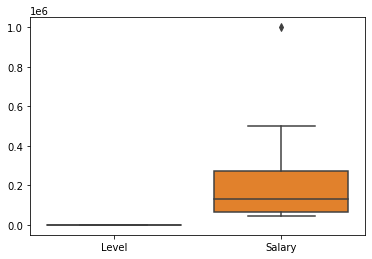

In [8]:
sns.boxplot(data=dataset)

In [9]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Handling outlier

In [10]:
quantile1,quantile3=np.percentile(dataset.Salary,[25,75])
quantile1,quantile3

(65000.0, 275000.0)

In [11]:
iqr=quantile3-quantile1
print(iqr)

210000.0


In [12]:
lower_bound=quantile1-(1.5*iqr)
upper_bound=quantile3+(1.5*iqr)

In [13]:
lower_bound

-250000.0

In [14]:
upper_bound

590000.0

In [15]:
dataset[dataset['Salary']>upper_bound]

,Position,Level,Salary
9,CEO,10,1000000


In [16]:
dataset=dataset[(dataset.Salary<upper_bound) & (dataset.Salary>lower_bound)]

In [17]:
dataset.describe()

,Level,Salary
count,9.000000,9.000000
mean,5.000000,166111.111111
std,2.738613,150328.344337
min,1.000000,45000.000000
25%,3.000000,60000.000000
50%,5.000000,110000.000000
75%,7.000000,200000.000000
max,9.000000,500000.000000


In [18]:
dataset=dataset.drop(columns=['Position'])

In [19]:
dataset

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000


## Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sd=StandardScaler()
dataset=sd.fit_transform(dataset)

In [22]:
x=dataset[:,:-1]
y=dataset[:,-1]

In [23]:
x

array([[-1.54919334],
       [-1.161895  ],
       [-0.77459667],
       [-0.38729833],
       [ 0.        ],
       [ 0.38729833],
       [ 0.77459667],
       [ 1.161895  ],
       [ 1.54919334]])

In [24]:
y

array([-0.85451438, -0.81923626, -0.74868003, -0.60756756, -0.39589886,
       -0.11367393,  0.23910723,  0.94466957,  2.35579423])

## Maodel building

In [25]:
from sklearn.svm import SVR


In [26]:
svr_model=SVR(kernel='rbf')

In [27]:
svr_model.fit(x,y)

SVR()

In [28]:
y_pred=svr_model.predict(x)

In [29]:
y_pred

array([-0.75459962, -0.75958443, -0.64811192, -0.50770311, -0.35708586,
       -0.1027246 ,  0.33902201,  0.84440747,  1.11455632])

## Performance matrix

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
R2_score=round(r2_score(y,y_pred),2)
R2_score

0.82

In [32]:
mean_square_error1=mean_squared_error(y,y_pred)
mean_square_error1

0.17732905395092308